In [1]:
%matplotlib inline
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import time

# Mean Plots

In [2]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
gray = (167/255, 168/255, 170/255, 1)
red = (179/255, 27/255, 27/255, 1)
blue = (0,47/255, 108/255,1)
markersize=10

In [3]:
# you can use this logic for filtering multiple runs
resultsMustBeAfter = time.struct_time((2021, 5, 25, 0, 0, 0, 0, 0, 0))
tResultsMustBeAfter = time.mktime(resultsMustBeAfter)
print(tResultsMustBeAfter)

1621918800.0


In [4]:
def plotWithColor(evaluation_filepaths, xval=0, color="black", desired_locality=0.1):
    data=[]
    for ind, filename in enumerate(evaluation_filepaths):
        tFile = os.path.getmtime(filename)
        if (tFile < tResultsMustBeAfter):
            continue
        evaluation_results = json.loads(
                open(filename, "r").read())
        locality = float(evaluation_results["evaluation_config.local_sample_factors.locality_proportion"])
        # I concerned.
        if locality != desired_locality:
            continue
        met_samps = evaluation_results[metvalname]
        data.append(np.mean(met_samps))
    vplot = plt.violinplot(np.array(data), [xval], points=20, widths=0.3, showextrema=True, showmedians=True)
    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = vplot[partname]
        vp.set_edgecolor(color)
        vp.set_linewidth(5)
        vp.set_alpha(1)
    for name in ["bodies"]:
        for pc in vplot[name]:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
            pc.set_alpha(0.5)
    return data # so we can run t-tests

In [5]:
datasetName = "'threeDots'" # note single quotes to match evaluation_results
# combinedOutputs is the path from the root directory to the JL1-VAE models. 
# If unzipping pre-trained models you may need to change this path. 
# This path works for models trained and evaluated with
# ./experimentScripts/train_jlonevae/train_threeDots.bash
# ./experimentScripts/evaluate_jlonevae/evaluate_threeDots.bash
# which stores models and evaluations in directories like:
# ./trainedModels/defaultConv_lone_beta4_0000_ica0_1000_lat10_batch64_lr0_0001_anneal100000/20210604-014949/representation
combinedOutputs = "trainedModels"
# If unzipping pre-trained models you may need to change this path.
# For example, if you download "trainedThreeDotJL1Models.zip"
# and unzip it into the directory "trainedThreeDotModelsBatches",
# then you should use filepath:
combinedOutputs = "trainedThreeDotModelsBatches"


# trainedStandardModels is the path from the root directory to the standard baseline models.
# If unzipping pre-trained models you may need to change this path. 
# This path works for models trained and evaluated with
# ./experimentScripts/train_baseline/train_standard_tf_models.bash
# ./experimentScripts/evaluate_baseline/postprocess_baseline_threeDots.bash
# ./experimentScripts/evaluate_baseline/evaluate_baseline.bash
# which stores models in directories like:
# ./trainedStandardModels/model101_on3dots/20210602-142643/
trainedStandardModels = "trainedStandardModels"
# Likewise, if you're unzipping pre-trained models you may need to update that path,
# depending on where you unzip the pretrained models to.
# For example, if you unzip each of the modelXXX_on3dots.zip files into their own folder
# inside, eg., ./standardModelsDownload/modelXXX_on3dots.zip then you can use
trainedStandardModels = "trainedBaselineModels"

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


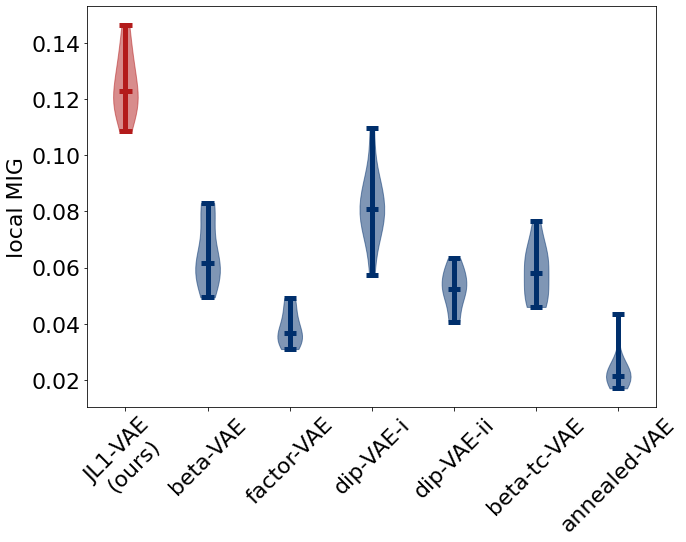

'beta_vae'
Ttest_indResult(statistic=11.429502063934287, pvalue=1.1009319037537678e-09)
'factor_vae'
Ttest_indResult(statistic=20.855877084215052, pvalue=4.666957727753043e-14)
'dip_vae_i'
Ttest_indResult(statistic=7.72821307385492, pvalue=3.9951403114220086e-07)
'dip_vae_ii'
Ttest_indResult(statistic=16.889008478982134, pvalue=1.7441925637267364e-12)
'beta_tc_vae'
Ttest_indResult(statistic=13.989811218712726, pvalue=4.11475798261182e-11)
'annealed_vae'
Ttest_indResult(statistic=23.601068813703513, pvalue=5.430664008399757e-15)


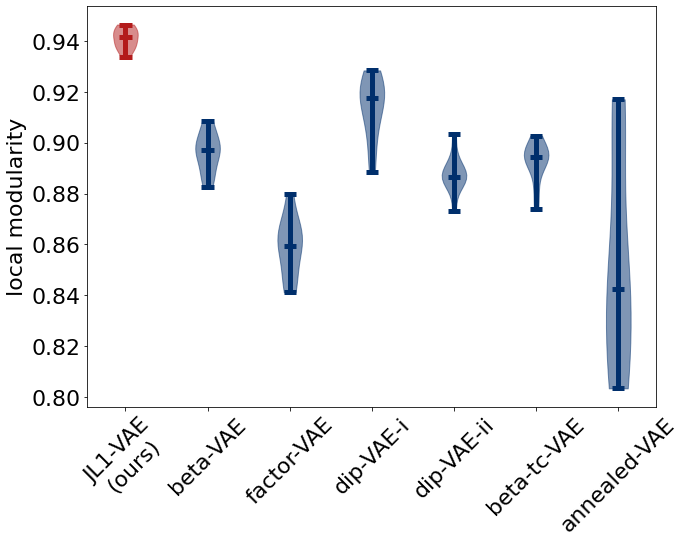

'beta_vae'
Ttest_indResult(statistic=15.729385748532884, pvalue=5.809008236108647e-12)
'factor_vae'
Ttest_indResult(statistic=20.818075791644695, pvalue=4.815919044523923e-14)
'dip_vae_i'
Ttest_indResult(statistic=6.589506800771631, pvalue=3.447686667188946e-06)
'dip_vae_ii'
Ttest_indResult(statistic=19.64697788529527, pvalue=1.3096301376811675e-13)
'beta_tc_vae'
Ttest_indResult(statistic=16.76007499284793, pvalue=1.9865443649947257e-12)
'annealed_vae'
Ttest_indResult(statistic=6.356966040147917, pvalue=5.470678552555236e-06)


In [6]:
for metric, metvalname in [("local_mig_0_1","evaluation_results.local_discrete_migs_samples"), 
               ("local_modularity_0_1","evaluation_results.local_modularity_scores_samples")]:
    dataDicts = []
    f = plt.figure(figsize=(10,8))
    ticklabels = ["JL1-VAE\n(ours)"]
    for minx, modgrp in enumerate([10,40,70,100,130,160]):
        evaluation_filepaths = glob.glob(f"../../{trainedStandardModels}/model{modgrp}?_on3dots/*/metrics/{metric}*/results/aggregate/evaluation.json")
        #print(evaluation_filepaths)
        disentangVals = plotWithColor(evaluation_filepaths, xval=minx+1, color=blue)
        evaluation_results = json.loads(
                open(evaluation_filepaths[0], "r").read())
        methodname = evaluation_results['train_config.model.name']
        if evaluation_results['evaluation_config.dataset.name'] != datasetName:
                    print(f"Skipping model evaluated on {evaluation_results['evaluation_config.dataset.name']}")
                    continue
        ticklabels.append(methodname.replace("'","").replace("_","-").replace("vae","VAE"))
        dataDicts.append((methodname, disentangVals))
    
    evaluation_filepaths = glob.glob(f"../../{combinedOutputs}/*ica0_1000_lat10*/*/metrics/{metric}*/results/aggregate/evaluation.json")
    #print(evaluation_filepaths)
    ourDisentangVals = plotWithColor(evaluation_filepaths, color=red)
    
    plt.ylabel(metric.replace("_0_1","").replace("_"," ").replace("mig","MIG"))
    plt.xticks(range(len(ticklabels)), ticklabels, rotation=45)
    plt.tight_layout()
    f.savefig(f"threeDots_{metric}_compareToStandard.png")
    plt.show();plt.close()
    
    import scipy.stats
    for methodname, disentangVals in dataDicts:
        print(methodname)
        print(scipy.stats.ttest_ind(ourDisentangVals, disentangVals))